# Predict Students' dropout and Academic success

Name of DataSet: Student Dropout

URL: https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success

Type: Classification

Domain: Academic & Other

Size: 36 columns 4424 rows

Target variable : Target

## DATA COLLECTION

In [67]:
def collect(dataset):
    import pandas as pd
    import numpy as np
    return pd.read_csv(dataset,header=0,sep=';')
    
data=collect("Student Dropout.csv")

In [68]:
data


,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,9773,1,1,125.0,1,1,1,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,9773,1,1,120.0,105,1,1,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,9500,1,1,154.0,1,37,37,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9147,1,1,180.0,1,37,37,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate


## DATA CLEANING 

### Removing Columns.

In [69]:
data.shape

(4424, 37)

In [70]:
def remove_col(data,col_to_del):
    data = data.drop(columns=col_to_del, axis=1)
    return data

data=remove_col(data,['Application mode',"Daytime/evening attendance\t","Mother's qualification","Father's qualification","Mother's occupation","Father's occupation","International","Curricular units 2nd sem (enrolled)","Curricular units 2nd sem (credited)","Curricular units 2nd sem (evaluations)","Curricular units 2nd sem (approved)",'Curricular units 2nd sem (grade)','Curricular units 2nd sem (without evaluations)',"Curricular units 1st sem (evaluations)","Curricular units 1st sem (enrolled)","Curricular units 1st sem (credited)","Curricular units 1st sem (approved)",'Curricular units 1st sem (grade)','Curricular units 1st sem (without evaluations)','Displaced'])
#del data['Application mode']

In [71]:
data.shape


(4424, 17)

In [72]:
data

,Marital status,Application order,Course,Previous qualification,Previous qualification (grade),Nacionality,Admission grade,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,Unemployment rate,Inflation rate,GDP,Target
0,1,5,171,1,122.0,1,127.3,0,0,1,1,0,20,10.8,1.4,1.74,Dropout
1,1,1,9254,1,160.0,1,142.5,0,0,0,1,0,19,13.9,-0.3,0.79,Graduate
2,1,5,9070,1,122.0,1,124.8,0,0,0,1,0,19,10.8,1.4,1.74,Dropout
3,1,2,9773,1,122.0,1,119.6,0,0,1,0,0,20,9.4,-0.8,-3.12,Graduate
4,2,1,8014,1,100.0,1,141.5,0,0,1,0,0,45,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,9773,1,125.0,1,122.2,0,0,1,1,0,19,15.5,2.8,-4.06,Graduate
4420,1,2,9773,1,120.0,105,119.0,0,1,0,0,0,18,11.1,0.6,2.02,Dropout
4421,1,1,9500,1,154.0,1,149.5,0,0,1,0,1,30,13.9,-0.3,0.79,Dropout
4422,1,1,9147,1,180.0,1,153.8,0,0,1,0,1,20,9.4,-0.8,-3.12,Graduate


### Checking Data types.

In [73]:
def check_dtype():
    #checking data types of all columns to see any inconsistency in data
    return data.dtypes
check_dtype()

Marital status                      int64
Application order                   int64
Course                              int64
Previous qualification              int64
Previous qualification (grade)    float64
Nacionality                         int64
Admission grade                   float64
Educational special needs           int64
Debtor                              int64
Tuition fees up to date             int64
Gender                              int64
Scholarship holder                  int64
Age at enrollment                   int64
Unemployment rate                 float64
Inflation rate                    float64
GDP                               float64
Target                             object
dtype: object

The code above shows that the we need to change the data type of the column 'Stage' but first we will handle the missing values.

### Handling Missing Values.

In [74]:
def check_null():
    # checking null values in all columns
    return data.isnull().sum()
check_null()

Marital status                    0
Application order                 0
Course                            0
Previous qualification            0
Previous qualification (grade)    0
Nacionality                       0
Admission grade                   0
Educational special needs         0
Debtor                            0
Tuition fees up to date           0
Gender                            0
Scholarship holder                0
Age at enrollment                 0
Unemployment rate                 0
Inflation rate                    0
GDP                               0
Target                            0
dtype: int64

In [75]:
def fill_missing():
    # handling all missing values.
    for col in data.columns:
        # missing values in numerical columns are replaced with mean
        if data[col].dtype == float:
            mean=data[col].mean()
            data[col]= data[col].fillna(mean)
        # missing values in discrete columns are replaced with median
        if data[col].dtype == int:
            median=data[col].median()
            data[col]= data[col].fillna(median)
        # missing values in categorical columns are replaced with mode
        if data[col].dtype == object:
            mode=data[col].mode().iloc[0]
            data[col]= data[col].fillna(mode)
    return data
# No missing values

### Changing Data Types.

In [76]:
def change_dtype(data,col,dtype):
    # changing data type of the desired column. 
    data[col]=data[col].astype(dtype)
    return data[col]
# here we dont need to change the data type of any column.

## DATA TRANSFORMATION 

### Changing Feature Names

In [77]:
def rename_feature(data,column_mapping):
    # This function changes names of columns
    # It takes two inputs: data and a dictionary where keys are old column names and values are new column names.
    return data.rename(columns=column_mapping,inplace=True)

rename_feature(data,{'Nacionality': 'Nationality','Tuition fees up to date': 'Tuition fee'})
    

In [78]:
data

,Marital status,Application order,Course,Previous qualification,Previous qualification (grade),Nationality,Admission grade,Educational special needs,Debtor,Tuition fee,Gender,Scholarship holder,Age at enrollment,Unemployment rate,Inflation rate,GDP,Target
0,1,5,171,1,122.0,1,127.3,0,0,1,1,0,20,10.8,1.4,1.74,Dropout
1,1,1,9254,1,160.0,1,142.5,0,0,0,1,0,19,13.9,-0.3,0.79,Graduate
2,1,5,9070,1,122.0,1,124.8,0,0,0,1,0,19,10.8,1.4,1.74,Dropout
3,1,2,9773,1,122.0,1,119.6,0,0,1,0,0,20,9.4,-0.8,-3.12,Graduate
4,2,1,8014,1,100.0,1,141.5,0,0,1,0,0,45,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,6,9773,1,125.0,1,122.2,0,0,1,1,0,19,15.5,2.8,-4.06,Graduate
4420,1,2,9773,1,120.0,105,119.0,0,1,0,0,0,18,11.1,0.6,2.02,Dropout
4421,1,1,9500,1,154.0,1,149.5,0,0,1,0,1,30,13.9,-0.3,0.79,Dropout
4422,1,1,9147,1,180.0,1,153.8,0,0,1,0,1,20,9.4,-0.8,-3.12,Graduate


### Separating Categorical and Numerical data.

In [79]:
def sep_col(data):
    # this function separates categorical and numerical columns of our data.
    categorical_columns = data.select_dtypes(include=['object']).columns
    numerical_columns = data.select_dtypes(exclude=['object']).columns
    return categorical_columns,numerical_columns
categorical_columns,numerical_columns=sep_col(data)

In [80]:
categorical_columns

Index(['Target'], dtype='object')

In [81]:
numerical_columns

Index(['Marital status', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Nationality', 'Admission grade', 'Educational special needs', 'Debtor',
       'Tuition fee', 'Gender', 'Scholarship holder', 'Age at enrollment',
       'Unemployment rate', 'Inflation rate', 'GDP'],
      dtype='object')

### Label Encoding

In [82]:
# Making all the necessary imports.
from numpy import array
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()

In [83]:
def encode():
    # this function standardize all categorical columns using builtin Python sklearn's LabelEncoder.
    for col in categorical_columns:
        data[col]=label_encoder.fit_transform(data[col])
    return data

data=encode()
    


### Standardization (Using Z-Score)

In [84]:
# Making all necessary imports
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [85]:
def standardize():
    # This function standarizes all numerical columns using built in StandaedScaler
    for col_name in numerical_columns:
        data[col_name]=scaler.fit_transform(data[[col_name]]).round(2)
    return data
data_num_norm=standardize()

In [86]:
data_num_norm

,Marital status,Application order,Course,Previous qualification,Previous qualification (grade),Nationality,Admission grade,Educational special needs,Debtor,Tuition fee,Gender,Scholarship holder,Age at enrollment,Unemployment rate,Inflation rate,GDP,Target
0,-0.29,2.49,-4.21,-0.35,-0.80,-0.13,0.02,-0.11,-0.36,0.37,1.36,-0.57,-0.43,-0.29,0.12,0.77,0
1,-0.29,-0.55,0.19,-0.35,2.08,-0.13,1.07,-0.11,-0.36,-2.72,1.36,-0.57,-0.56,0.88,-1.11,0.35,2
2,-0.29,2.49,0.10,-0.35,-0.80,-0.13,-0.15,-0.11,-0.36,-2.72,1.36,-0.57,-0.56,-0.29,0.12,0.77,0
3,-0.29,0.21,0.44,-0.35,-0.80,-0.13,-0.51,-0.11,-0.36,0.37,-0.74,-0.57,-0.43,-0.81,-1.47,-1.38,2
4,1.36,-0.55,-0.41,-0.35,-2.47,-0.13,1.00,-0.11,-0.36,0.37,-0.74,-0.57,2.86,0.88,-1.11,0.35,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,-0.29,3.25,0.44,-0.35,-0.58,-0.13,-0.33,-0.11,-0.36,0.37,1.36,-0.57,-0.56,1.48,1.14,-1.79,2
4420,-0.29,0.21,0.44,-0.35,-0.96,14.92,-0.55,-0.11,2.79,-2.72,-0.74,-0.57,-0.69,-0.18,-0.45,0.89,0
4421,-0.29,-0.55,0.31,-0.35,1.62,-0.13,1.56,-0.11,-0.36,0.37,-0.74,1.74,0.89,0.88,-1.11,0.35,0
4422,-0.29,-0.55,0.14,-0.35,3.59,-0.13,1.85,-0.11,-0.36,0.37,-0.74,1.74,-0.43,-0.81,-1.47,-1.38,2


# Exploratory Data Analysis 

In [87]:
data_num_norm.columns

Index(['Marital status', 'Application order', 'Course',
       'Previous qualification', 'Previous qualification (grade)',
       'Nationality', 'Admission grade', 'Educational special needs', 'Debtor',
       'Tuition fee', 'Gender', 'Scholarship holder', 'Age at enrollment',
       'Unemployment rate', 'Inflation rate', 'GDP', 'Target'],
      dtype='object')

In [88]:
def drop_col(numerical_columns,col):
    # This function removes the irrelevant column from the subdataset numerical_columns.
    numerical_columns=numerical_columns.drop(col)
    return numerical_columns

#here instead of dropping certain columns we are selecting certain columns.


In [89]:
def select_col(numerical_columns, cols_to_keep):
    # This function selects only the specified columns from the subdataset numerical_columns.
    selected_columns = numerical_columns[cols_to_keep]
    return selected_columns

numerical_columns=select_col(data_num_norm, ["Previous qualification (grade)", "Admission grade", "Tuition fee","Age at enrollment", "Unemployment rate", "Inflation rate", "GDP"])


In [98]:
numerical_columns

,Previous qualification (grade),Admission grade,Tuition fee,Age at enrollment,Unemployment rate,Inflation rate,GDP
0,-0.80,0.02,0.37,-0.43,-0.29,0.12,0.77
1,2.08,1.07,-2.72,-0.56,0.88,-1.11,0.35
2,-0.80,-0.15,-2.72,-0.56,-0.29,0.12,0.77
3,-0.80,-0.51,0.37,-0.43,-0.81,-1.47,-1.38
4,-2.47,1.00,0.37,2.86,0.88,-1.11,0.35
...,...,...,...,...,...,...,...
4419,-0.58,-0.33,0.37,-0.56,1.48,1.14,-1.79
4420,-0.96,-0.55,-2.72,-0.69,-0.18,-0.45,0.89
4421,1.62,1.56,0.37,0.89,0.88,-1.11,0.35
4422,3.59,1.85,0.37,-0.43,-0.81,-1.47,-1.38


#### Histograms of important numerical variables

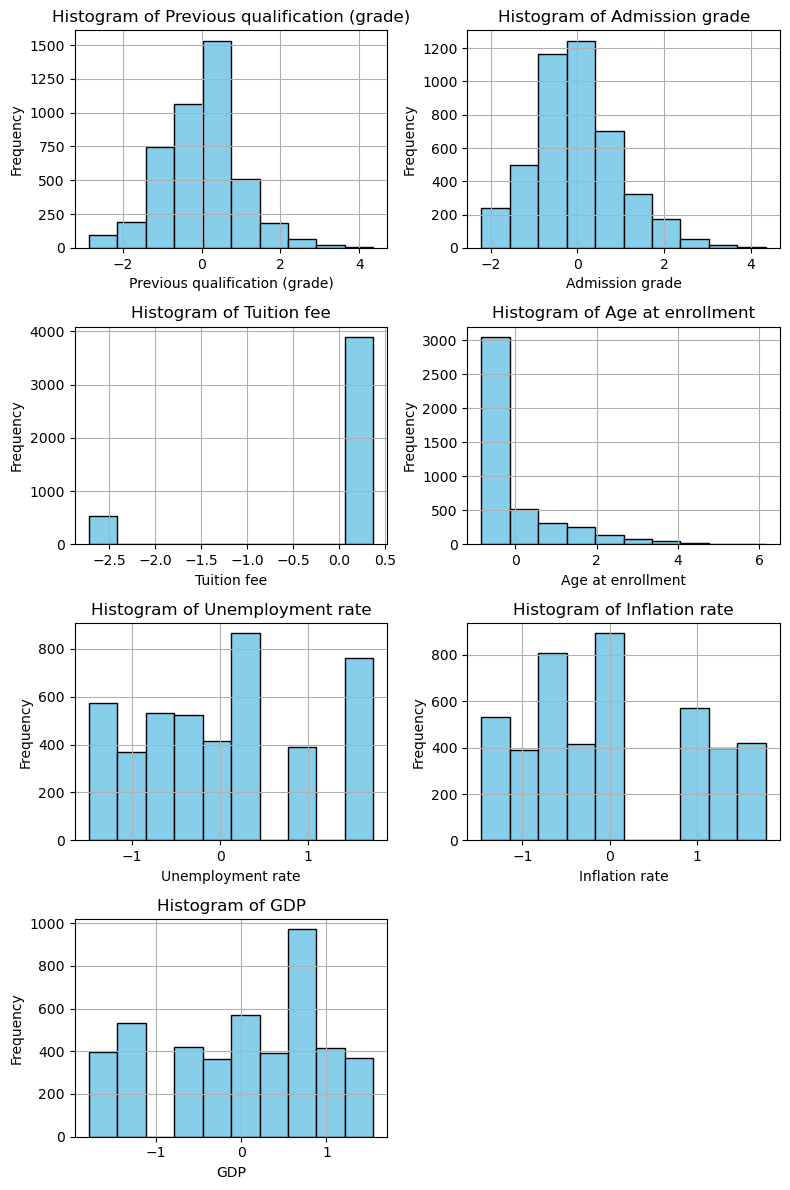

In [100]:
def plot_histogram():
    import pandas as pd
    import matplotlib.pyplot as plt


    # Set the number of columns per row
    columns_per_row = 2
    

    # Calculate the number of rows needed to display histograms
    num_rows = (len(numerical_columns.columns) + columns_per_row - 1) // columns_per_row

    # Set the figure size based on the number of rows and columns per row
    fig_width = 4 * columns_per_row
    fig_height = 3 * num_rows
    plt.figure(figsize=(fig_width, fig_height))

    # Create histograms for the numerical columns
    for i, column in enumerate(numerical_columns, start=1):
        plt.subplot(num_rows, columns_per_row, i)
        plt.hist(data_num_norm[column], bins=10, color='skyblue', edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.grid(True)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()
    
    
plot_histogram()

#### Boxplots of important numerical variables

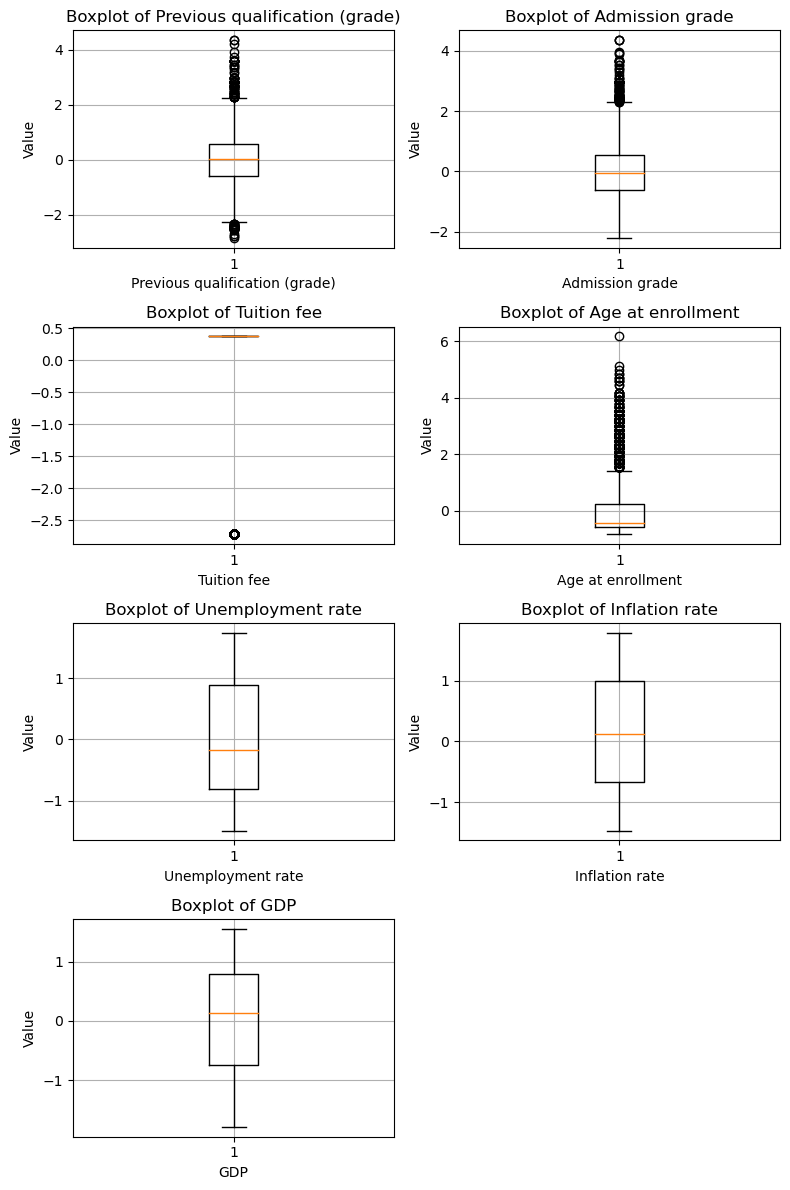

In [49]:
def plot_boxplot():
    import pandas as pd
    import matplotlib.pyplot as plt

    # Set the number of columns per row
    columns_per_row = 2

    # Calculate the number of rows needed to display boxplots
    num_rows = (len(numerical_columns) + columns_per_row - 1) // columns_per_row

    # Set the figure size based on the number of rows and columns per row
    fig_width = 4 * columns_per_row
    fig_height = 3 * num_rows
    plt.figure(figsize=(fig_width, fig_height))

    # Create boxplots for the numerical columns
    for i, column in enumerate(numerical_columns, start=1):
        plt.subplot(num_rows, columns_per_row, i)
        plt.boxplot(data_num_norm[column])
        plt.title(f'Boxplot of {column}')
        plt.xlabel(column)
        plt.ylabel('Value')
        plt.grid(True)

    # Adjust layout and display
    plt.tight_layout()
    plt.show()

plot_boxplot()

#### Five number summary

In [50]:
def five_num_summ(data):
    # This function return the five number summary of our dataset.
    return data.describe()
# we need 5 number summary of our numerical_columns
five_num_summ(data[numerical_columns])

,Previous qualification (grade),Admission grade,Tuition fee,Age at enrollment,Unemployment rate,Inflation rate,GDP
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,0.000436,0.000337,0.001212,0.001273,0.000332,-0.001370,0.000511
std,1.000362,0.999827,1.001887,0.999063,1.000879,1.001306,1.002329
min,-2.850000,-2.210000,-2.720000,-0.830000,-1.490000,-1.470000,-1.790000
25%,-0.580000,-0.630000,0.370000,-0.560000,-0.810000,-0.670000,-0.750000
50%,0.040000,-0.060000,0.370000,-0.430000,-0.180000,0.120000,0.140000
75%,0.560000,0.540000,0.370000,0.230000,0.880000,0.990000,0.790000
max,4.350000,4.350000,0.370000,6.160000,1.740000,1.790000,1.550000


### INTERPRETATION

By above ploting the previous qualification and admission grades is approximately symmetric around the mean (0.04). Most individuals fall within the range of -0.58 to 0.56 & -0.63 to 0.54 standard deviations from the mean. Tuition fee of majority students is near to 0.37. Age at enrollement shows right skewed lies between -0.83 to 0.23. Unemplotyment mostly at -0.18, now comes to inflation rate between -067 to 0.99. The GDP is also the right skewed and are between -0.75 to 0.79. the results of Tuition fee outliers are out of the box shows not good results because of centered focus.

## Detecting Outliers and Anomalies



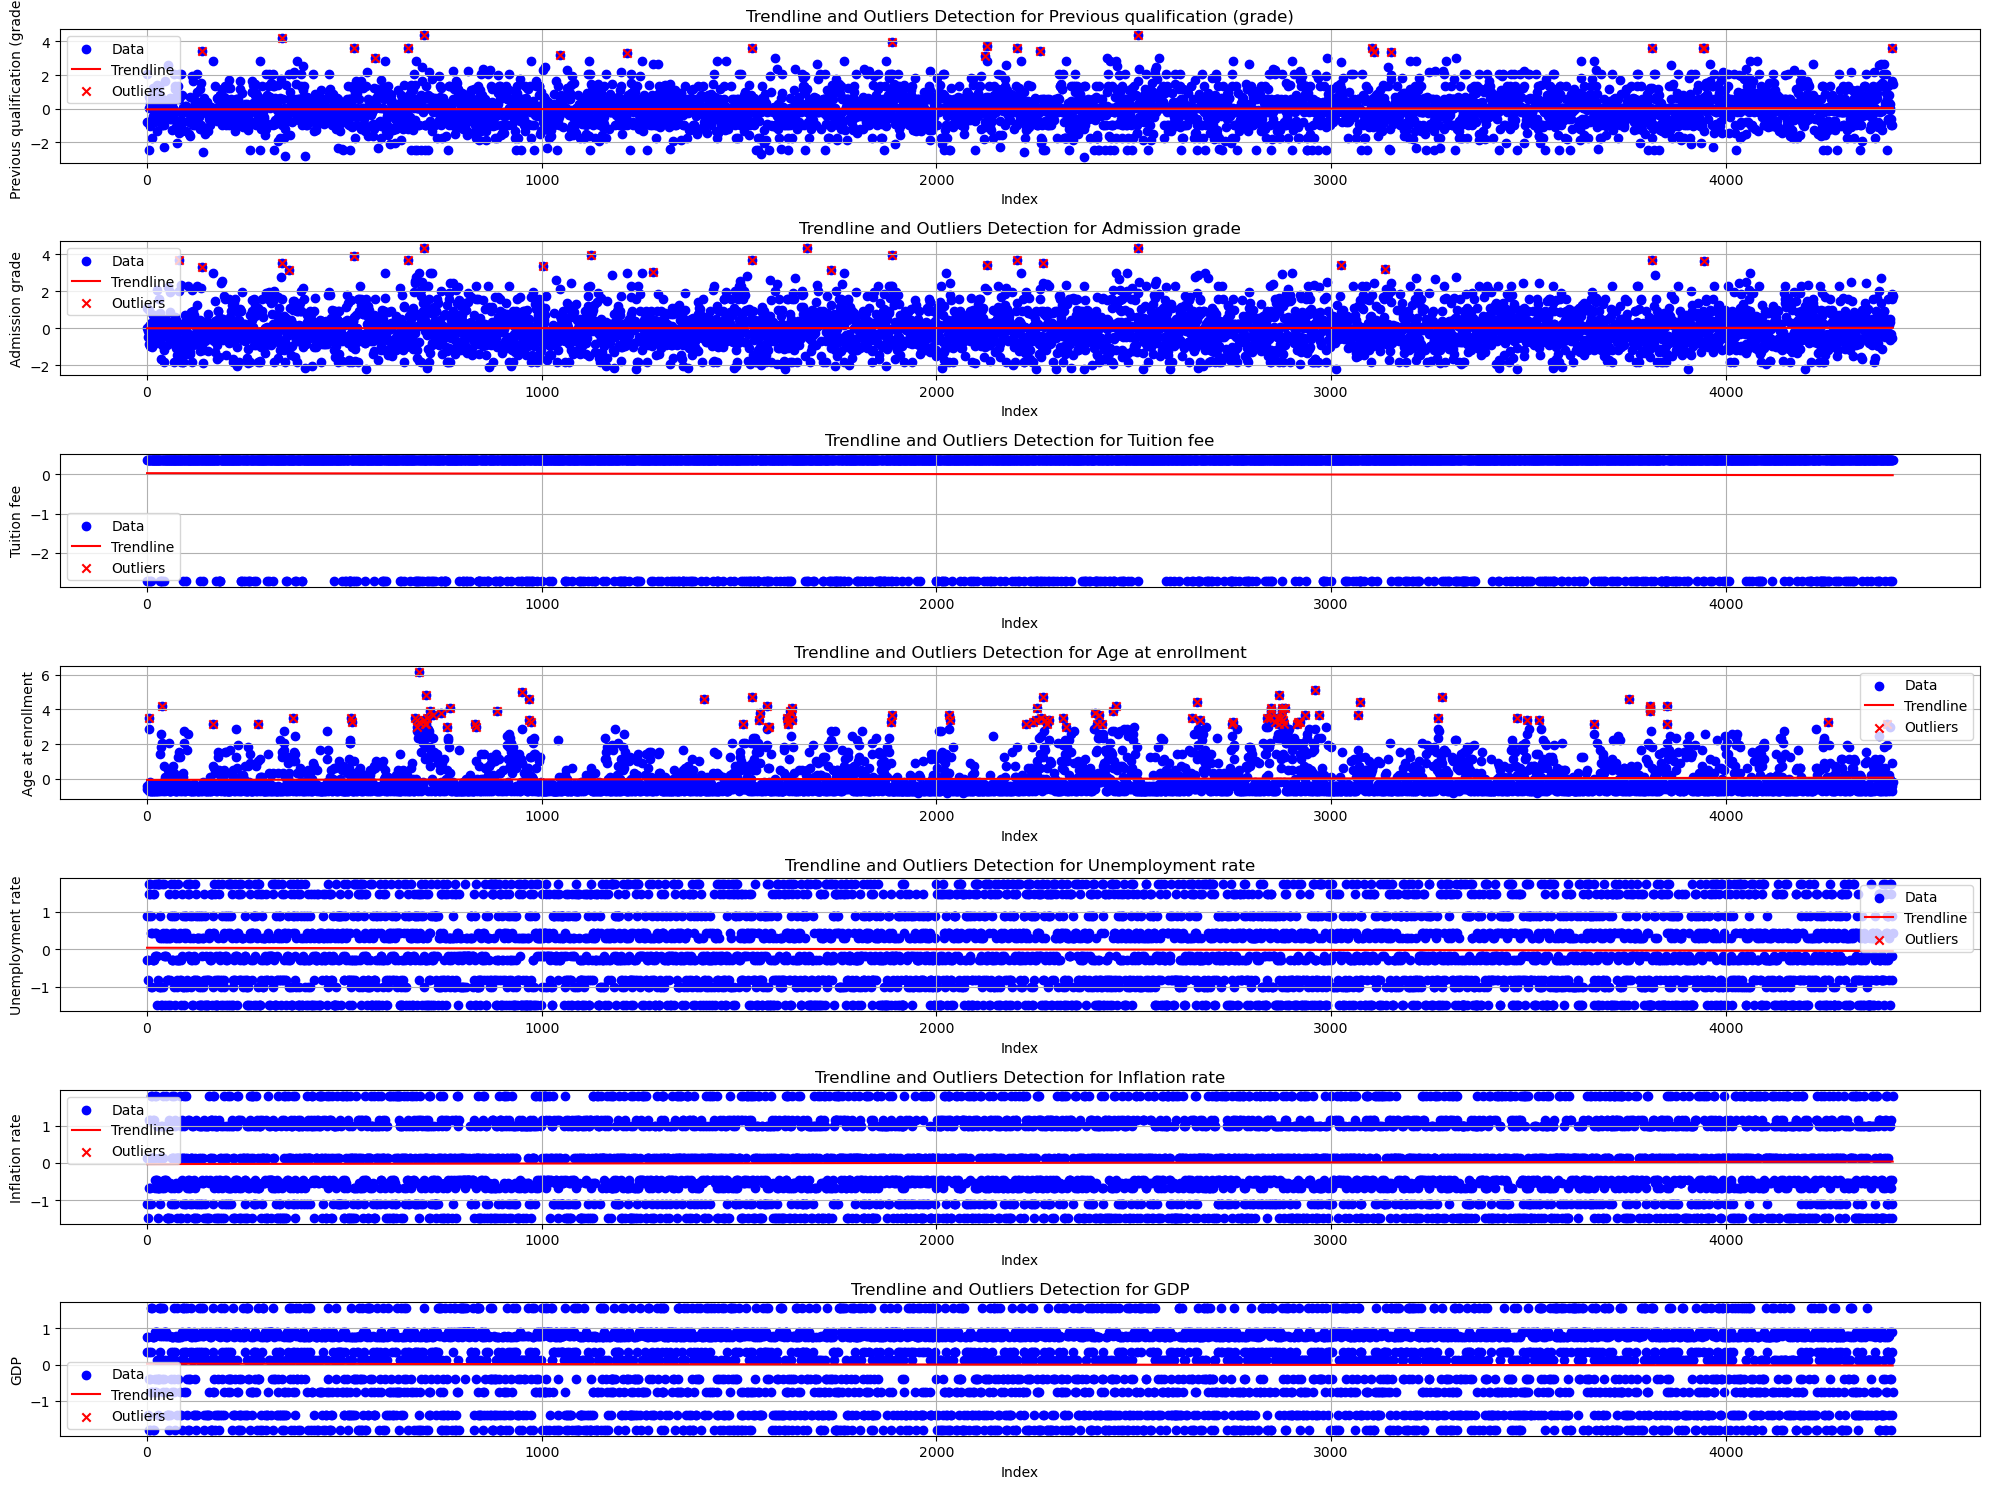

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

def detect_outl(df):
    # Create subplots for each numerical column
    plt.figure(figsize=(20, 15))

    # Detect outliers and plot trendlines for each numerical column
    for i, column in enumerate(df, 1):
        # Fit linear regression model
        model = LinearRegression()
        model.fit(data_num_norm.index.values.reshape(-1, 1), data_num_norm[column].values)  # Reshape to 1D array
        y_pred = model.predict(data_num_norm.index.values.reshape(-1, 1))

        # Calculate residuals
        residuals = data_num_norm[column].values - y_pred

        # Calculate Z-scores of residuals
        z_scores = (residuals - np.mean(residuals)) / np.std(residuals)

        # Define a threshold for outlier detection
        threshold = 3

        # Identify outliers based on Z-scores
        outliers = np.abs(z_scores) > threshold

        # Plot data points
        plt.subplot(len(numerical_columns), 1, i)
        plt.scatter(data_num_norm.index, data_num_norm[column], label='Data', color='blue')

        # Plot trendline
        plt.plot(data_num_norm.index, y_pred, label='Trendline', color='red')

        # Highlight outliers
        plt.scatter(data_num_norm.index[outliers], data_num_norm[column][outliers], color='red', label='Outliers', marker='x')

        plt.title(f'Trendline and Outliers Detection for {column}')
        plt.xlabel('Index')  # You may need to change the xlabel based on your data
        plt.ylabel(column)
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

detect_outl(numerical_columns)

## Feature Engineering 

In [65]:
numerical_columns

['Previous qualification (grade)',
 'Admission grade',
 'Tuition fee',
 'Age at enrollment',
 'Unemployment rate',
 'Inflation rate',
 'GDP']

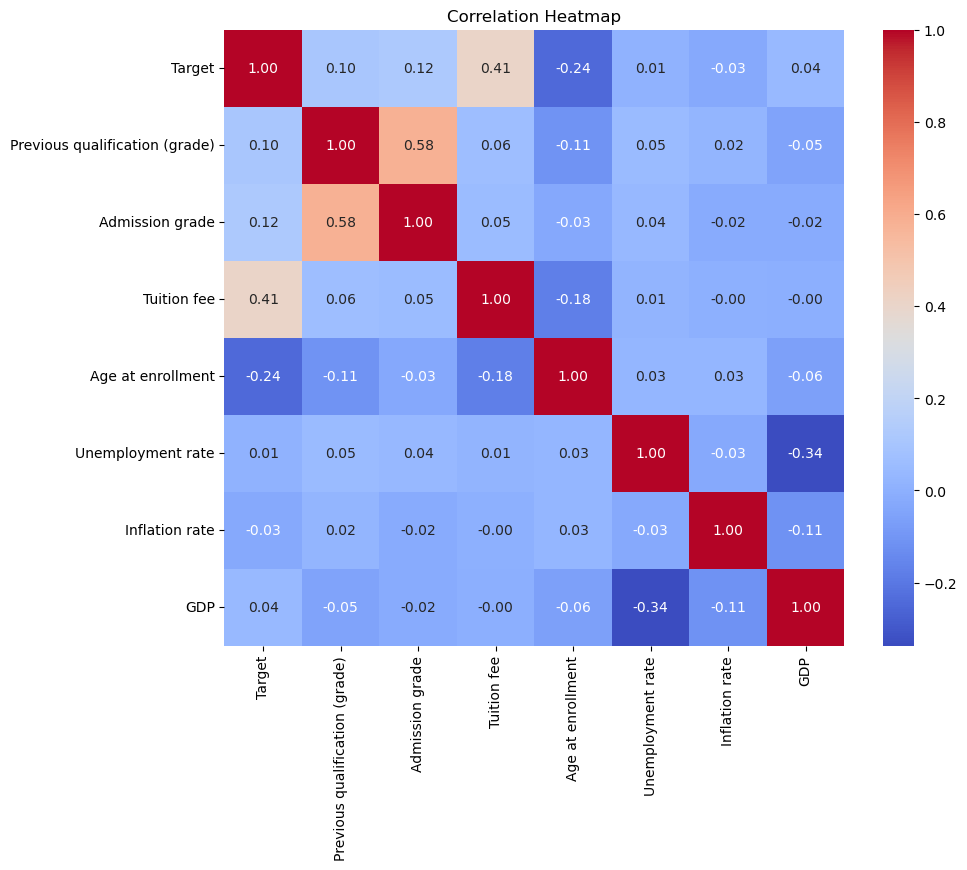

In [63]:
def feature_eng(target,df):
    import pandas as pd
    import seaborn as sns
    import matplotlib.pyplot as plt

    # Assuming 'target_column' is your target variable and 'feature_columns' are your feature columns
    target_column = target
    feature_columns = df

    # Extract the subset of data containing only the features and the target variable
    data_subset = data[[target_column] + feature_columns]

    # Calculate the correlation matrix
    correlation_matrix = data_subset.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Heatmap')
    plt.show()

feature_eng('Target',numerical_columns)

## Dimensionality Reduction


## Model Selection
Manual splitting is done using Linear Regression

Cross Validation is done using KNN.



## Model Training

After selection of model, the next step is to determine the target variable (label) and the relevant features i.e., X and Y. In our case, label (Y) is 'Target' and all the other numerical features that we have not dropped are the features (X).

To train and fit the model, first we will split our data manually and evaluate its performance Then we will split using Cross Validation and then reevaluate the performance of our model.

### Manual Data Splitting 

In [61]:
def fit_model(df,target,k):
    import pandas as pd
    from sklearn.model_selection import train_test_split, cross_val_score
    from sklearn.linear_model import LinearRegression
    from sklearn.metrics import accuracy_score

    # Assuming 'target_column' is the target variable and 'feature_columns' are the feature columns
    target_column = target
    feature_columns = df


    # Split data into features and target variable
    X = data[feature_columns]
    y = data[target_column]

    # Perform manual train-validation-test split (70% train, 15% validation, 15% test)
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=30)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.1765, random_state=30)  # 15/85 = 0.1765

    # Train a model on the training set
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Calculate Train Accuracy
    y_train_pred = model.predict(X_train)
    train_accuracy = accuracy_score(y_train, y_train_pred.round())
    print(f'Train Accuracy: {train_accuracy}')

    # Calculate Validation Accuracy
    y_val_pred = model.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred.round())
    print(f'Validation Accuracy: {val_accuracy}')

    # Calculate Test Accuracy
    y_test_pred = model.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred.round())
    print(f'Test Accuracy: {test_accuracy}')


fit_model(numerical_columns,'Target',3)

Train Accuracy: 0.3333333333333333
Validation Accuracy: 0.3117469879518072
Test Accuracy: 0.32981927710843373


### Cross Validation

In [59]:

def fit_model_cv(df,target,k,KF):
    import pandas as pd
    from sklearn.model_selection import cross_val_score, train_test_split
    from sklearn.neighbors import KNeighborsClassifier

    # Assuming 'target_column' is your target variable and 'feature_columns' are your feature columns
    target_column = target
    feature_columns = df

    # Split data into features and target variable
    X = data[feature_columns]
    y = data[target_column]

    # Initialize KNN classifier
    knn = KNeighborsClassifier(n_neighbors=k)  # You can adjust the number of neighbors (k) as needed

    # Perform cross-validation to calculate accuracy in different folds
    cv_scores = cross_val_score(knn, X, y, cv=KF, scoring='accuracy')

    # Print accuracy in each fold
    for fold, accuracy in enumerate(cv_scores, 1):
        print(f'Fold {fold} Accuracy: {accuracy}')

    # Calculate and print average accuracy
    average_accuracy = cv_scores.mean()
    print(f'Average Accuracy: {average_accuracy}')

fit_model_cv(numerical_columns,'Target',5,5)

Fold 1 Accuracy: 0.5254237288135594
Fold 2 Accuracy: 0.5683615819209039
Fold 3 Accuracy: 0.559322033898305
Fold 4 Accuracy: 0.5265536723163842
Fold 5 Accuracy: 0.5565610859728507
Average Accuracy: 0.5472444205844006


### INTERPRETATION

The model is trained on a portion of the training data and then evaluated on a separate portion validation data. The fold accuracies indicate how well the model performs on different subsets of the data. The accuracy of Fold 1 is approximately 52.54%, Fold 2 is 56.84%, Fold 3 is 55.93%, Fold 4 is 52.66%, and Fold 5 is 55.66%.

By average accuracy the model correctly predicts the target variable for about 54.72% of the samples across all folds.

The results are ok on this dataset but not better enough

## Model Evaluation

In [66]:
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def evaluate_classification(y_true, y_pred_prob):
    """
    Evaluate a classification model and generate various performance metrics.

    Parameters:
        y_true (array-like): True labels of the data.
        y_pred_prob (array-like): Predicted probabilities of the positive class.

    Returns:
        dict: A dictionary containing precision, recall, F1-score, accuracy, AUC, and ROC curve data.
    """
    # Calculate precision, recall, and F1-score for each class
    precision = precision_score(y_true, y_pred_prob.argmax(axis=1), average=None)
    recall = recall_score(y_true, y_pred_prob.argmax(axis=1), average=None)
    f1 = f1_score(y_true, y_pred_prob.argmax(axis=1), average=None)

    # Calculate overall accuracy
    accuracy = accuracy_score(y_true, y_pred_prob.argmax(axis=1))

    # Calculate AUC
    auc = roc_auc_score(y_true, y_pred_prob[:, 1])

    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob[:, 1])

    # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc="lower right")
    plt.show()

    # Create a dictionary to store the evaluation metrics
    evaluation_metrics = {
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'accuracy': accuracy,
        'auc': auc,
        'roc_curve': {'fpr': fpr, 'tpr': tpr, 'thresholds': thresholds}
    }

    return evaluation_metrics


## ML Pipeline

In [76]:
def master():
    collect(dataset)
    remove_col(data,col)
    check_dtype()
    check_null()
    fill_missing()
    change_dtype(data,col,dtype)
    rename_feature(data,column_mapping)
    sep_col(data)
    encode()
    standardize()
    drop_col(numerical_columns,col)
    select_col(numerical_columns, cols_to_keep)
    plot_histogram()
    plot_boxplot()
    five_num_summ(data)
    df_num_col(data)
    detect_outl(df)
    fetaure_eng()
    dim_red()
    select_model()
    fit_model(data,target,k)
    fit_model_cv(data,target,k,KF)
    model_eval()